In [1]:
# combination of SMOTE and random undersampling for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

import time
import re
import pickle
from string import punctuation
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

In [5]:

df=pd.read_csv("updated-Copy1.csv")
df

,Unnamed: 0,category,text
0,0,U.S. NEWS,4 million american roll sleeve omicrontargeted...
1,1,U.S. NEWS,american airline flyer charge ban life punch f...
2,2,COMEDY,23 funniest tweet cat dog week sept 1723until ...
3,3,PARENTING,funniest tweet parent week sept 1723accidental...
4,4,U.S. NEWS,woman call cop black birdwatcher loses lawsuit...
...,...,...,...
209522,209522,TECH,rim ceo thorsten heins significant plan blackb...
209523,209523,SPORTS,maria sharapova stun victoria azarenka austral...
209524,209524,SPORTS,giant patriot jet colt among improbable super ...
209525,209525,SPORTS,aldon smith arrest 49ers linebacker bust duico...


In [6]:
df.drop(columns=["Unnamed: 0"],axis=1,inplace=True)
df

,category,text
0,U.S. NEWS,4 million american roll sleeve omicrontargeted...
1,U.S. NEWS,american airline flyer charge ban life punch f...
2,COMEDY,23 funniest tweet cat dog week sept 1723until ...
3,PARENTING,funniest tweet parent week sept 1723accidental...
4,U.S. NEWS,woman call cop black birdwatcher loses lawsuit...
...,...,...
209522,TECH,rim ceo thorsten heins significant plan blackb...
209523,SPORTS,maria sharapova stun victoria azarenka austral...
209524,SPORTS,giant patriot jet colt among improbable super ...
209525,SPORTS,aldon smith arrest 49ers linebacker bust duico...


In [7]:
df=df.dropna()
df.isna().sum()

category    0
text        0
dtype: int64

# Splitting Data

In [8]:
X=df["text"]
y=df["category"]

In [9]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)
transformer = TfidfTransformer()
# Transform the matrix of token counts into a matrix of TF-IDF values
X = transformer.fit_transform(X)


In [10]:
print(X.shape)
print(y.shape)

(209515, 228317)
(209515,)


In [11]:
undersampler = RandomUnderSampler(sampling_strategy="all")
# Transform the matrix of TF-IDF values using the undersampler
X= undersampler.fit_resample(X,y)

In [12]:
X_trans=X[0]

In [13]:
y_trans=X[1]
y_trans

0             ARTS
1             ARTS
2             ARTS
3             ARTS
4             ARTS
           ...    
42583    WORLDPOST
42584    WORLDPOST
42585    WORLDPOST
42586    WORLDPOST
42587    WORLDPOST
Name: category, Length: 42588, dtype: object

In [14]:
oversampler = SMOTE(sampling_strategy="all")
X_s= oversampler.fit_resample(X_trans,y_trans)

In [15]:
X=X_s[0]
y=X_s[1]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Modeling 


In [17]:
from sklearn.metrics import classification_report, accuracy_score,f1_score,precision_score,recall_score
def scores(y_train,y_test, pred_train, pred_test):
    print()
    print("Train data accuracy score: ", accuracy_score(y_train,pred_train))    
    print("Test data accuracy score: ", accuracy_score(y_test,pred_test))
    print()
    print("Recall score on train data: ", recall_score(y_train,pred_train, average='macro'))
    print("Recall score on test data: ",recall_score( y_test,pred_test, average='macro'))
    print()
    
    print("Precision score on train data: ",precision_score(y_train,pred_train, average='macro'))
    print("Precision score on test data: ",precision_score(y_test,pred_test, average='macro'))
    print()
    print("F1 score on train data: ",f1_score(y_train,pred_train, average='macro'))
    print("F1 score on test data: ",f1_score(y_test,pred_test, average='macro'))

In [48]:
modelsvc=LinearSVC()
modelsvc.fit(X_train,y_train)
y_pred_train=modelsvc.predict(X_train)
y_pred_test = modelsvc.predict(X_test)
scores(y_train,y_test,y_pred_train,y_pred_test)


Train data accuracy score:  0.9961804577189193
Test data accuracy score:  0.45740584202122664

Recall score on train data:  0.9961844988540941
Recall score on test data:  0.45713248243461685

Precision score on train data:  0.9961958988005284
Precision score on test data:  0.45375215134391284

F1 score on train data:  0.9961848137440752
F1 score on test data:  0.4538139407599968


In [46]:
model1=MultinomialNB()
model1.fit(X_train,y_train)
y_pred_train=model1.predict(X_train)
y_pred_test = model1.predict(X_test)
scores(y_train,y_test,y_pred_train,y_pred_test)



Train data accuracy score:  0.8294668294668295
Test data accuracy score:  0.44698037005729313

Recall score on train data:  0.8294195885686987
Recall score on test data:  0.44776135698243635

Precision score on train data:  0.841989276733198
Precision score on test data:  0.47153945738625297

F1 score on train data:  0.8310159229001977
F1 score on test data:  0.4437469862636353


In [ ]:
l1=[]
for i in range(1,130):
    model2=KNeighborsClassifier(n_neighbors=i)
    model2.fit(X_train,y_train)
    y_pred_train=model2.predict(X_train)
    y_pred_test = model2.predict(X_test)
    temp=accuracy_score(y_pred_test,y_test)
    l1.append(temp*100)
    # scores(y_train,y_test,y_pred_train,y_pred_test)

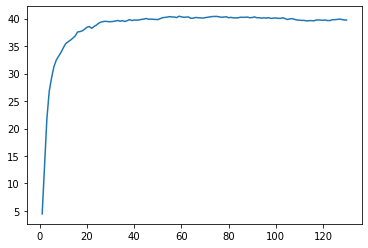

In [102]:
l2=[i for i in range(1,131)]
knnlist=l1
knnlist=np.array(knnlist).reshape(-1,1)
l2=np.array(l2).reshape(-1,1)
plt.plot(l2,knnlist)

maximum accuracy occurs at k=60, that is 40%

In [23]:
model3 = RandomForestClassifier()
model3.fit(X_train,y_train)
y_pred_train=model3.predict(X_train)
y_pred_test = model3.predict(X_test)
scores(y_train,y_test,y_pred_train,y_pred_test)



Train data accuracy score:  0.9999686922763846
Test data accuracy score:  0.4152343383112614

Recall score on train data:  0.9999685890187209
Recall score on test data:  0.4156749764002802

Precision score on train data:  0.9999694357845834
Precision score on test data:  0.4357901213123285

F1 score on train data:  0.9999689922198934
F1 score on test data:  0.40785877138885984


## Model Tuning

In [20]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,0.5,0.1):
    temp_classifier = MultinomialNB (alpha=i) 
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i

Accuracy score for alpha=0.1 is: 43.93%
Accuracy score for alpha=0.2 is: 44.85%
Accuracy score for alpha=0.3 is: 45.4%
Accuracy score for alpha=0.4 is: 45.21%


In [80]:
param_grid = {'penalty':['l1','l2','elasticnet','none']}
grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=0,cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

## Unsupervised Learning:

## K-Means

In [21]:
km = KMeans(n_clusters=15)
km.fit(X_train)

KMeans(n_clusters=15)

In [22]:
y_pred=km.predict(X_test)
print(adjusted_rand_score(y_test,y_pred))

0.004794452233923177


# MLP

In [76]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=500)

In [79]:
y_pred=mlp.predict(X_test)
y_pred_train=mlp.predict(X_train)
scores(y_train,y_test,y_pred_train,y_pred)



Train data accuracy score:  0.9982467674775367
Test data accuracy score:  0.1291443599135907

Recall score on train data:  0.998248226675636
Recall score on test data:  0.12943166350765722

Precision score on train data:  0.9982544364224405
Precision score on test data:  0.16851937160753447

F1 score on train data:  0.998249512050582
F1 score on test data:  0.13684898009984853


## MiniBatchKMeans Clustering

In [34]:
from sklearn.cluster import MiniBatchKMeans
cls = MiniBatchKMeans(n_clusters=70)
cls.fit(X_train)
y_pred=cls.predict(X_test)
print(adjusted_rand_score(y_test,y_pred))

MiniBatchKMeans(n_clusters=50)

the adjusted rand score is 0.01 which is not very accurate

## PCA - Dimension Reduction 

In [43]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from scipy import sparse as sp

In [69]:
clf = TruncatedSVD(100)
X_sp = clf.fit_transform(X)
pca = PCA(n_components=50)
pca.fit(X_sp)
X_pca = pca.transform(X_sp)

In [70]:
xsptr,xspte,ysptr,yspte=train_test_split(X_pca,y,test_size=0.3,random_state=48)
modelsvc.fit(xsptr,ysptr)
y_pred_train=modelsvc.predict(xsptr)
y_pred_test = modelsvc.predict(xspte)

In [71]:
scores(ysptr,yspte,y_pred_train,y_pred_test)


Train data accuracy score:  0.3155882056958841
Test data accuracy score:  0.2999139078030837

Recall score on train data:  0.31596135916117585
Recall score on test data:  0.29939682755111285

Precision score on train data:  0.31173499951366695
Precision score on test data:  0.29648798647702856

F1 score on train data:  0.3031115643547543
F1 score on test data:  0.2867093513930195
